In [1]:
# import argparse
# import json
import os
# from pathlib import Path
import pickle
# import glob

import matplotlib.pyplot as plt

# import pandas as pd
import numpy as np

from collections import OrderedDict

from functools import lru_cache

# from softlearning.environments.utils import get_environment_from_params
# from softlearning import policies
# from softlearning import replay_pools
# from softlearning.samplers import rollouts
# from softlearning.utils.tensorflow import set_gpu_memory_growth
# from softlearning.utils.video import save_video
# from examples.development.main import ExperimentRunner

In [6]:
# def load_replay_pool(ray_path, variant, env):
#     variant['replay_pool_params']['config'].update({'environment': env})
#     replay_pool = replay_pools.get(variant['replay_pool_params'])

#     experiment_root = os.path.dirname(ray_path)

#     experience_paths = [os.path.join(checkpoint_dir, 'replay_pool.pkl') for checkpoint_dir in sorted(glob.iglob(os.path.join(experiment_root, 'checkpoint_*')))]
#     for experience_path in experience_paths:
#         replay_pool.load_experience(experience_path)

#     return replay_pool

# def load_environment(variant, env_kwargs):
#     environment_params = (
#         variant['environment_params']['training']
#         if 'evaluation' in variant['environment_params']
#         else variant['environment_params']['training'])
#     # environment_params["kwargs"]["renders"] = True
#     # environment_params["kwargs"]["step_duration"] = 1/60
#     environment_params["kwargs"].update(env_kwargs)

#     environment = get_environment_from_params(environment_params)
#     return environment

In [2]:
# ray_path = "/home/externalhardrive/softlearning_models/mixed_nav_rf_rnd_newton_1/"
# variant_path = ray_path + "params.pkl"

# with open(variant_path, 'rb') as f:
#     variant = pickle.load(f)

# env = load_environment(variant, {})
# print(variant)

In [3]:
# variant['replay_pool_params']['config'].update({'environment': env})

In [4]:
# def get_all_replay_pool_paths(ray_path):
#     experiment_root = os.path.dirname(ray_path)
#     experience_paths = [os.path.join(checkpoint_dir, 'replay_pool.pkl') for checkpoint_dir in sorted(glob.iglob(os.path.join(experiment_root, 'checkpoint_*')))]
#     return experience_paths

# def load_replay_pool_single(pool_path, variant):
#     replay_pool = replay_pools.get(variant['replay_pool_params'])
#     replay_pool.load_experience(pool_path)
#     return replay_pool

In [15]:
# replay_pool_paths = get_all_replay_pool_paths(ray_path)

In [5]:
# pool = load_replay_pool_single(replay_pool_paths[0], variant)

In [2]:
def traj_path(i):
    return os.path.join('../nohup_output/trajectories', f'trajectory_380537_{i}.npy')

lru_cache(maxsize=None)
def traj(i):
    return np.load(traj_path(i))

def trajs(i_first, i_last):
    return np.vstack([traj(i) for i in range(i_first, i_last)])

iterations = list(range(1, 94))

In [13]:
def plot_traj(i_first, i_last):
    t = trajs(i_first, i_last)
    plt.xlim(-3.5, 3.5)
    plt.ylim(-3.5, 3.5)
    plt.plot(t[:, 0], t[:, 1], label=f'{i_first}-{i_last-1}')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.plot([t[0][0]], [t[0][1]], marker='o', markersize=10, color="green") 
    plt.plot([t[-1][0]], [t[-1][1]], marker='o', markersize=10, color="red")

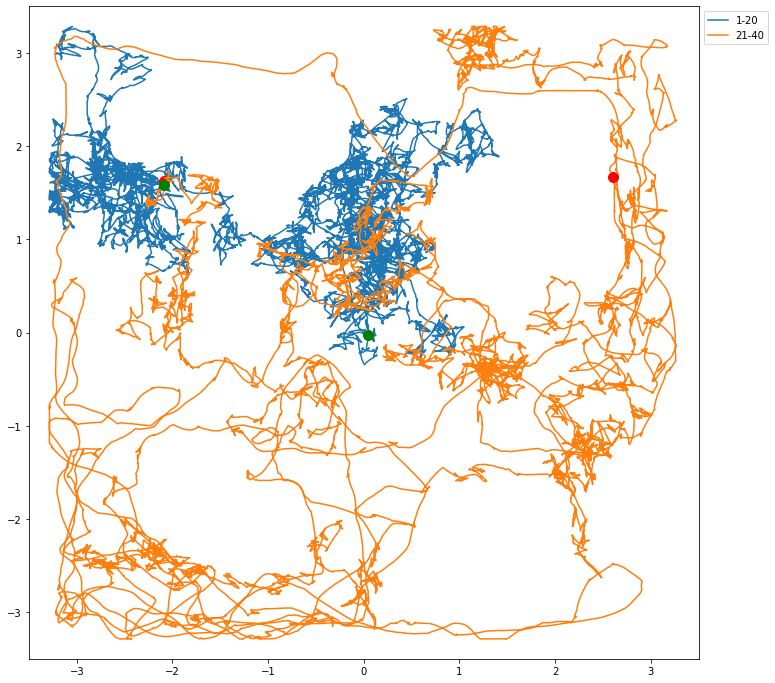

In [14]:
plt.figure(figsize=(12, 12))
plot_traj(1, 21)
plot_traj(21, 41)

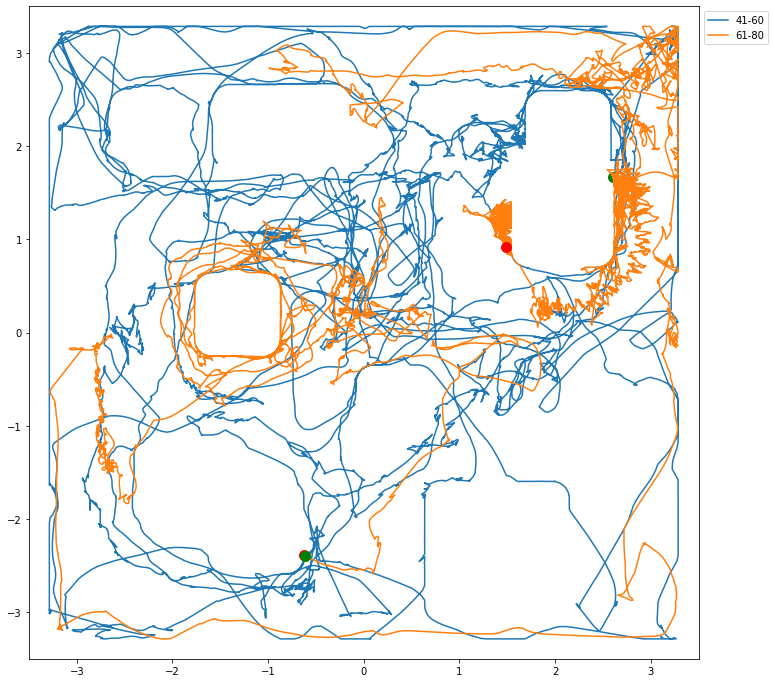

In [15]:
plt.figure(figsize=(12, 12))
plot_traj(41, 61)
plot_traj(61, 81)

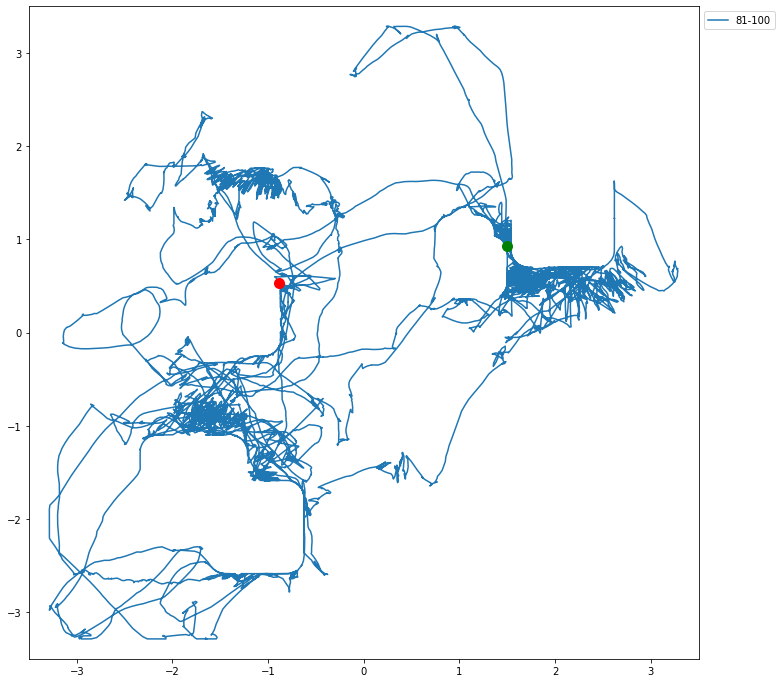

In [36]:
plt.figure(figsize=(12, 12))
plot_traj(81, 101)

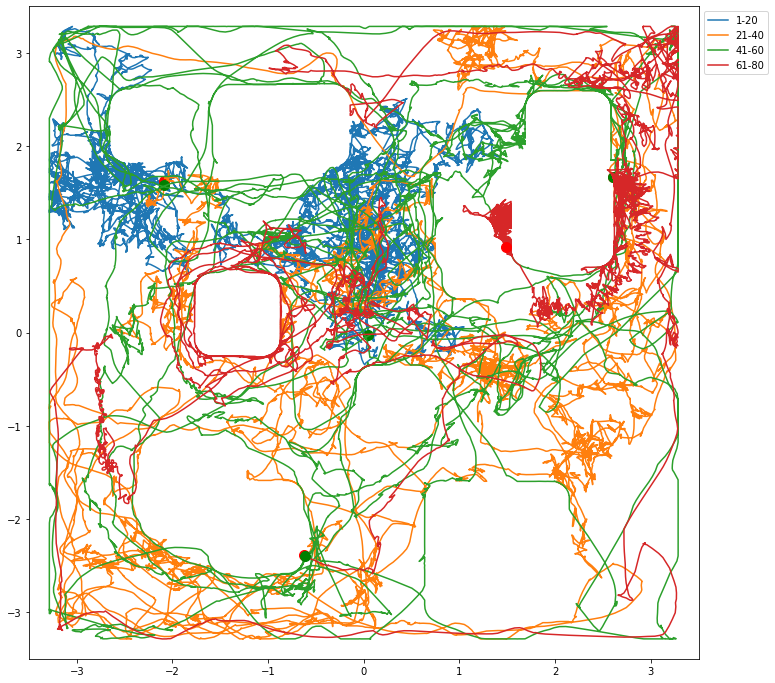

In [16]:
plt.figure(figsize=(12, 12))
plot_traj(1, 21)
plot_traj(21, 41)
plot_traj(41, 61)
plot_traj(61, 81)

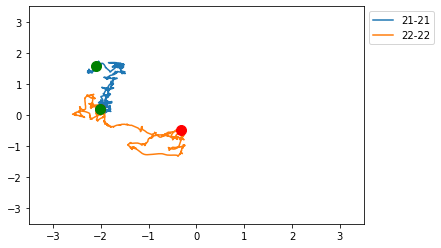

In [32]:
i = 
plot_traj(i, i+1)
plot_traj(i+1, i+2)

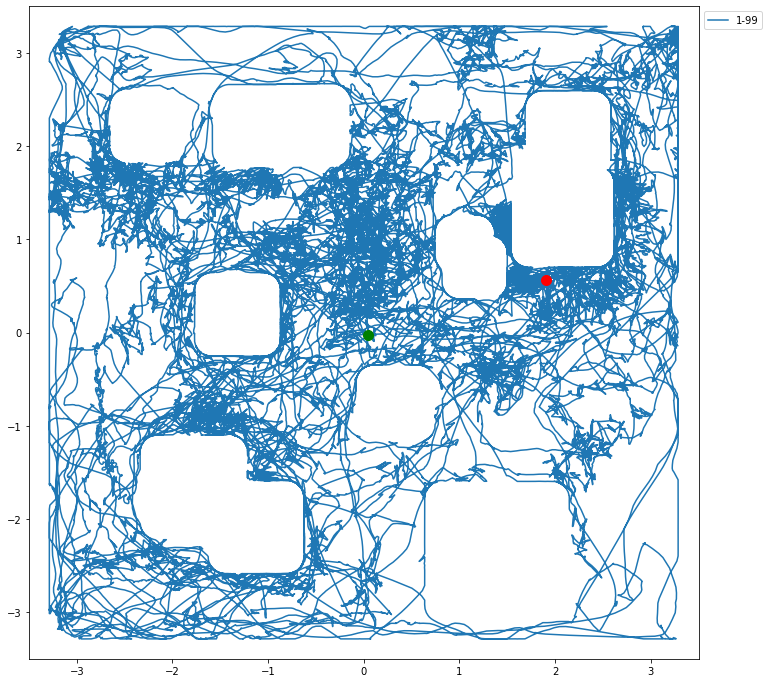

In [34]:
plt.figure(figsize=(12, 12))
plot_traj(1, 100)

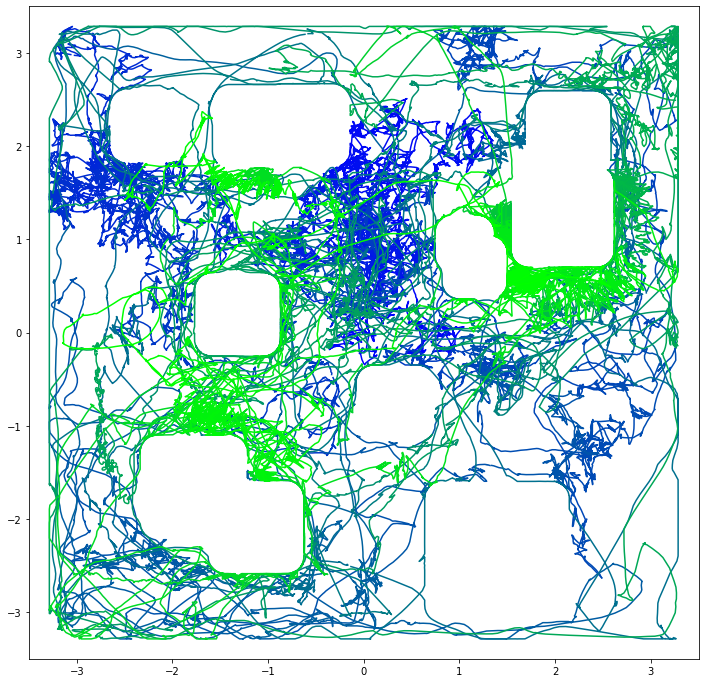

In [42]:
def plot(i_first, i_last, color):
    t = trajs(i_first, i_last)
    plt.plot(t[:, 0], t[:, 1], label=f'{i_first}-{i_last-1}', color=color)
#     plt.plot([t[0][0]], [t[0][1]], marker='o', markersize=10, color="green") 
#     plt.plot([t[-1][0]], [t[-1][1]], marker='o', markersize=10, color="red")

plt.figure(figsize=(12, 12))
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")

step = 1
for i in range(1, 101, step):
    plot(i, i + step, (0, i/100, 1 - (i/100), 1))

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
from functools import lru_cache
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: list index out of range

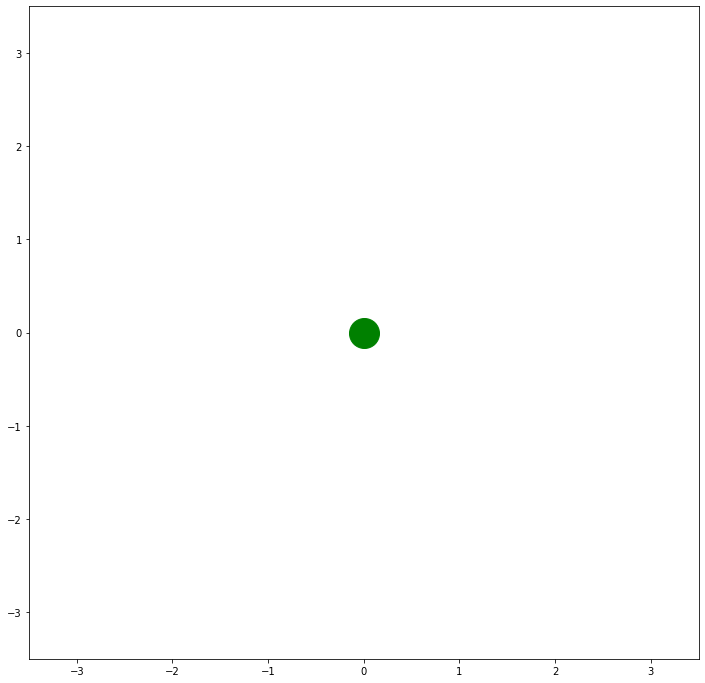

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((-3.5, 3.5))

line, = ax.plot([], [], lw=1)
dot, = ax.plot([], [], marker='o', markersize=30, color="green")

def init():
    line.set_data([], [])
    dot.set_data([0], [0])
    return line,

t_start = 0
t_end = 100000
t_step = 250
t_draw_step = 1

x = []
y = []

def animate(i):
    path = traj_range(i * t_step, (i + 1) * t_step)
    x.extend(path[::t_draw_step, 0].tolist())
    y.extend(path[::t_draw_step, 1].tolist())
    line.set_data(x, y)
    dot.set_data([x[-1]], [y[-1]])
    return line,

import time

start = time.time()

# anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
anim = FuncAnimation(fig, animate, init_func=init, frames=t_end//t_step, interval=75, blit=True)
# HTML(anim.to_html5_video())
anim.save("../nohup_output/trajectory.mp4")

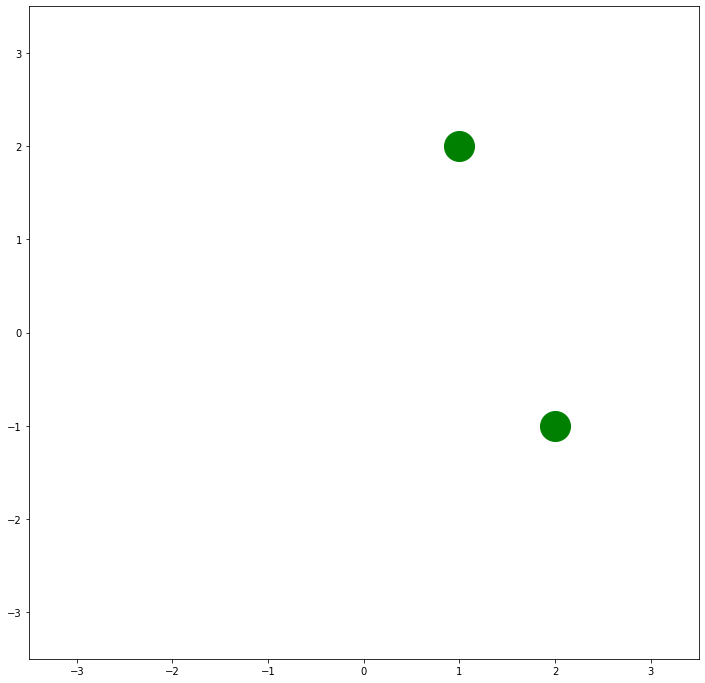

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.set_xlim((-3.5, 3.5))
ax.set_ylim((-3.5, 3.5))

# line, = ax.plot([], [], lw=1)
dot, = ax.plot([], [], marker='o', markersize=30, color="green", lw=0)

dot.set_data([1, 2], [2, -1])